In [1]:
import numpy as np    
import cv2
import matplotlib.pyplot as pl   
import os 

#Defining our imshow function

def imshow(title = "", image = None, size =5):
    w= image.shape[0]
    h=image.shape[1]
    aspect_ratio = w/h     
    pl.figure(figsize = (size*aspect_ratio,size))
    pl.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    pl.title(title)
    pl.show()

In [2]:
#Fresh definition of imshow function

def imshow(title = "", image = None, size = 5):
 
    pl.figure(figsize=(size , size))
    pl.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    pl.title(title)
    pl.show()

## Definition for Saturated Img Function

In [3]:
def SatImg(image):
    image = cv2.imread(image)

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    satimg = hsv_image[:, :, 1]

    imshow('saturated',satimg)

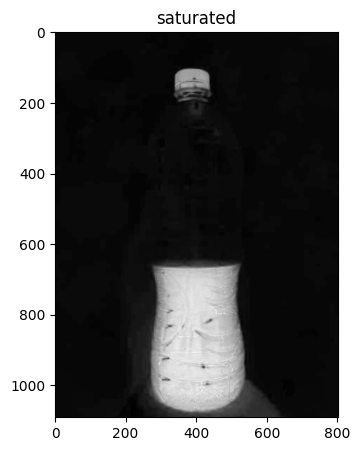

In [4]:
SatImg('Bottles_resources\B3_Halffilled.jpg')

## Definition for Thresh Function

In [5]:
def thresh(image):

    img = cv2.imread(image)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0) #take out noise 

    ret, thresh = cv2.threshold(blur, 120, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C) #thresh to separate water from background
    imshow("thresh", thresh)

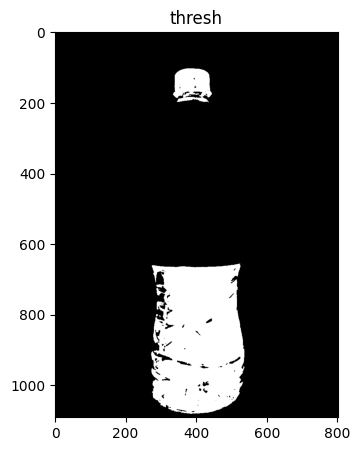

In [6]:
thresh('Bottles_resources\B3_Halffilled.jpg')

## Definition for Level Detection(no contours) Function  


In [7]:
def Level_Detection(image):
    img = cv2.imread(image)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the image to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply thresholding to the blurred image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the contour with the largest area as the detected bottle
    largest_contour = None
    largest_area = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > largest_area:
            largest_area = area
            largest_contour = contour

    # Draw a bounding box around the detected bottle
    if largest_contour is not None:
        x, y, w, h = cv2.boundingRect(largest_contour)
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.line(img, (x-1500,y), (x+1500, y),(0, 0, 255), 2)

    img = cv2.resize(img,(200,200))



    # Display the resulting image
    imshow('Bottle Detection', img)

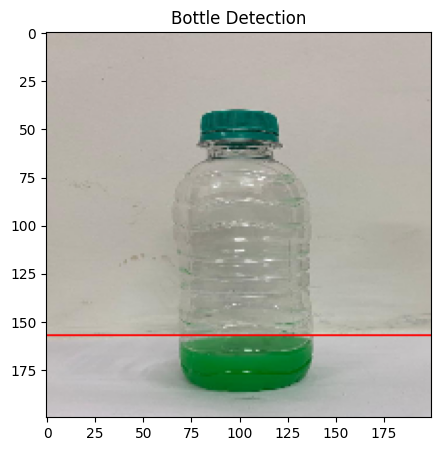

In [8]:
Level_Detection('Bottles_resources\T23.jpg')

## Definition for Level Detection(contours) Function


In [9]:
def ClrL(image):
    img = cv2.imread(image)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0) #take out noise 

    ret, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY_INV) #thresh to separate water from background

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #contours of the water 

    max_contour = max(contours, key=cv2.contourArea) #biggest area in water 

    cv2.drawContours(img, [max_contour], -1, (0, 0, 255), 2) #contour on org img 

    distance = max_contour[0][0][1]  #distance from top of bottle to the level 

    cv2.line(img, (0, distance), (img.shape[1], distance), (0, 255, 0), 2) #draw line on water level 
    imshow('Water Level', img)



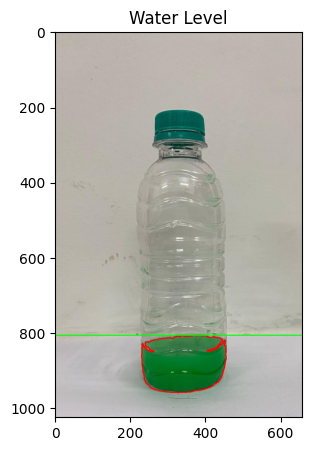

In [10]:
ClrL('Bottles_resources\T23.jpg')

## Definition for Colored Liquid Level Detection Function

This is the final piece of code that fulfils all the requirements

In [2]:
import cv2
import numpy as np

def Colored_Liquid(image):
    im = cv2.imread(image)

    img = cv2.resize(im, (800,1000))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0) #take out noise 

    ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) #thresh to separate water from background

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE) #contours of the water 

    max_contour = max(contours, key=cv2.contourArea) #biggest area in water 


    cv2.drawContours(img, [max_contour], -1, (0, 0, 255), 4) #contour on org img 

    distance = max_contour[0][0][1]  #distance from top of bottle to the level 

    cv2.line(img, (0, distance), (img.shape[1], distance), (0, 255, 0), 2) #draw line on water level 
    cv2.line(img, (0,420), (800,420),(0,255,0), 2) 
    x_axis = int(3*(0 + img.shape[1])/4)
    cv2.putText(img,  "reference line", (x_axis, 400),cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0,0,255),2)
    X_axis = int((0 + img.shape[1])/10)


    dist_ance = ((distance - 420)/distance)*100
    rounded = round(dist_ance,2)
    hello = print("The percentage of empty part is ", rounded)
    cv2.putText(img,  "percentage of empty = " + str(rounded), (50, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0,0,255),2)

    

    #cv2.putText(img,  "percentage of empty = " + str(rounded), (x_axis, distance-100),cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1)

    if rounded<10 and rounded>-10: 
        cv2.putText(img,  "Accepted", (X_axis, distance-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0,0,255),2)
    elif rounded<-10:
        cv2.putText(img,  "Overfilled", (X_axis, distance-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0,0,255),2)
    else: 
        cv2.putText(img,  "Underfilled", (X_axis, distance-20),cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0,0,255),2)


    imshow('Water Level',img)

The percentage of empty part is  -3.19


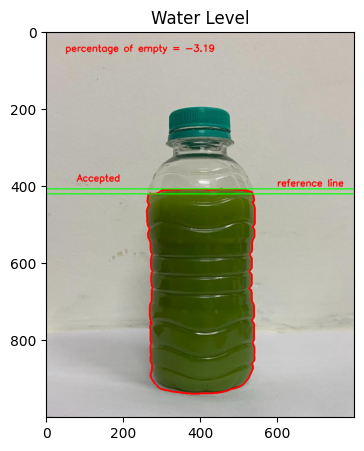

In [12]:
Colored_Liquid('Bottles_resources\T1.jpg')

The percentage of empty part is  25.53


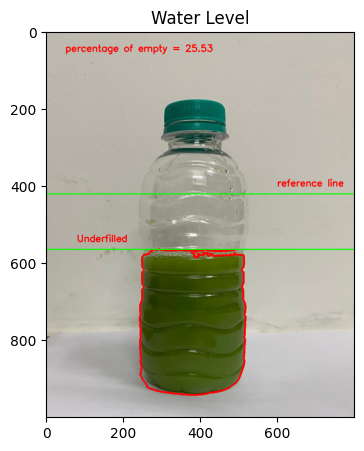

In [13]:
Colored_Liquid('Bottles_resources\T2.jpg')

The percentage of empty part is  -35.92


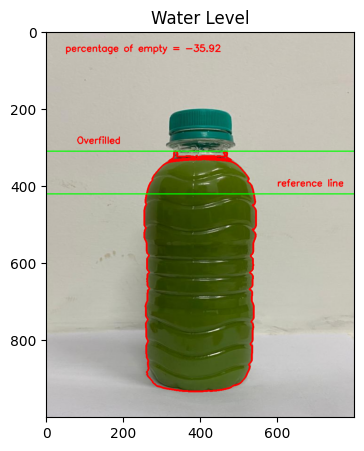

In [14]:
Colored_Liquid('Bottles_resources\T3.jpg')

The percentage of empty part is  -0.72


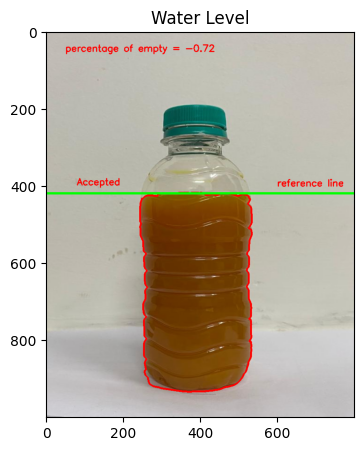

In [15]:
Colored_Liquid('Bottles_resources\T4.jpg')

The percentage of empty part is  38.6


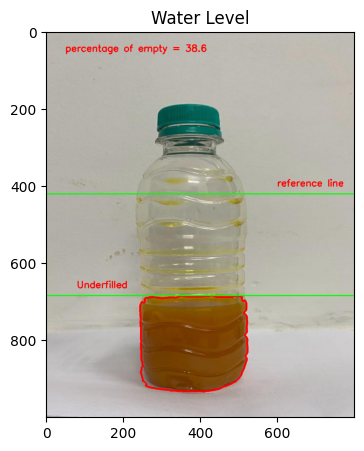

In [16]:
Colored_Liquid('Bottles_resources\T5.jpg')

The percentage of empty part is  -16.34


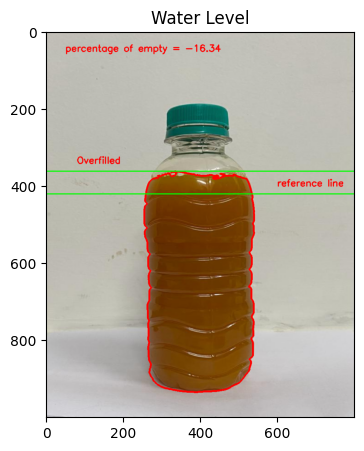

In [17]:
Colored_Liquid('Bottles_resources\T6.jpg')

The percentage of empty part is  -2.19


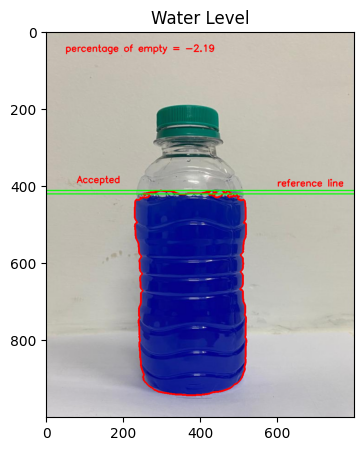

In [18]:
Colored_Liquid('Bottles_resources\T7.jpg')

The percentage of empty part is  43.78


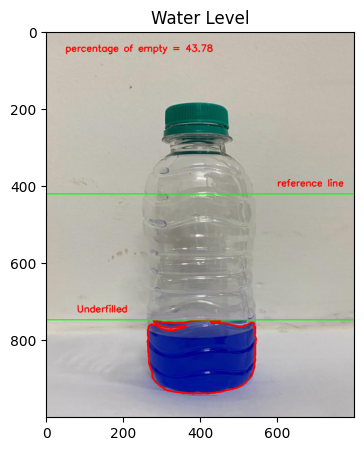

In [19]:
Colored_Liquid('Bottles_resources\T8.jpg')

The percentage of empty part is  -25.0


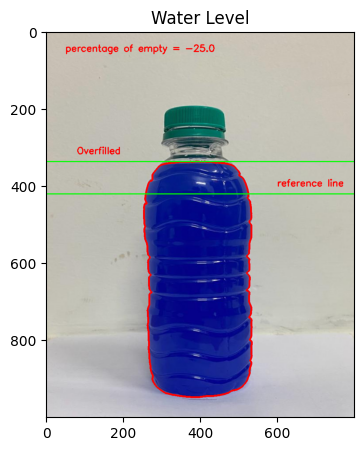

In [20]:
Colored_Liquid('Bottles_resources\T9.jpg')

The percentage of empty part is  -1.69


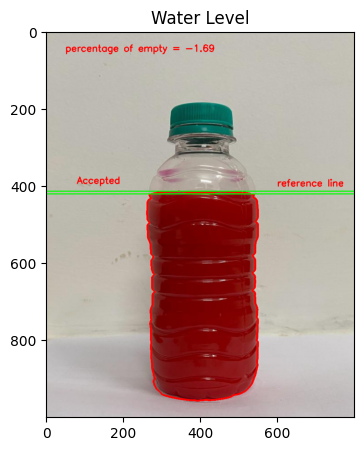

In [21]:
Colored_Liquid('Bottles_resources\T10.jpg')

The percentage of empty part is  12.86


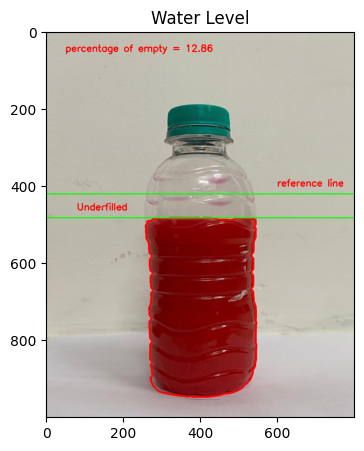

In [22]:
Colored_Liquid('Bottles_resources\T11.jpg')

The percentage of empty part is  -29.23


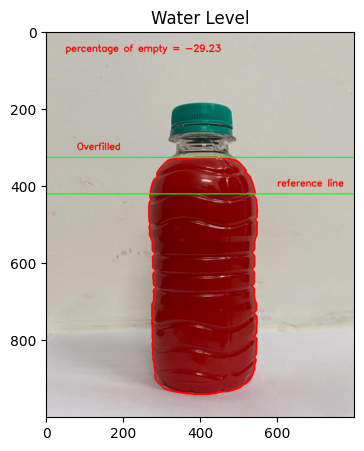

In [23]:
Colored_Liquid('Bottles_resources\T12.jpg')

The percentage of empty part is  -3.7


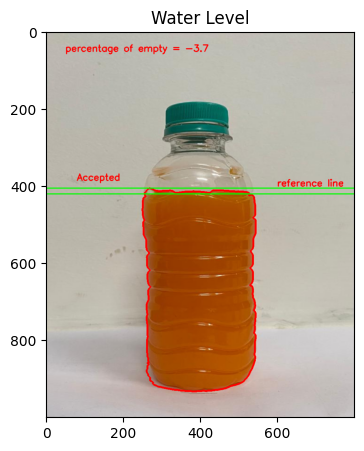

In [24]:
Colored_Liquid('Bottles_resources\T13.jpg')

The percentage of empty part is  33.54


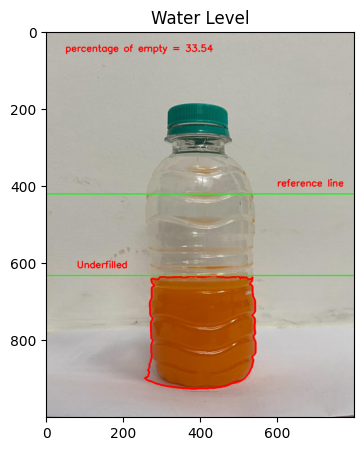

In [25]:
Colored_Liquid('Bottles_resources\T14.jpg')

The percentage of empty part is  -26.89


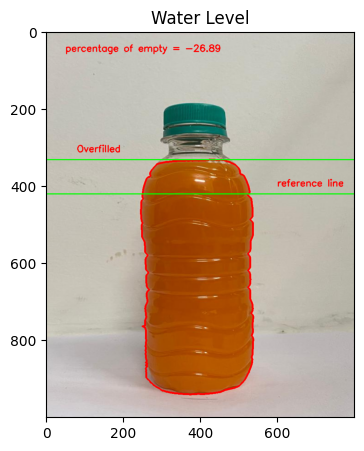

In [26]:
Colored_Liquid('Bottles_resources\T15.jpg')

The percentage of empty part is  -0.72


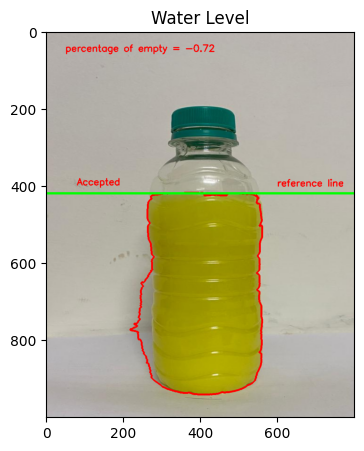

In [27]:
Colored_Liquid('Bottles_resources\T16.jpg')

The percentage of empty part is  -475.34


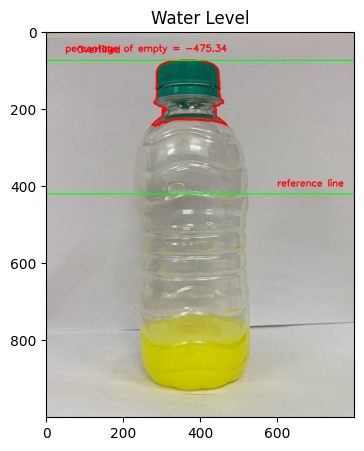

In [28]:
Colored_Liquid('Bottles_resources\T17.jpg')

The percentage of empty part is  -19.66


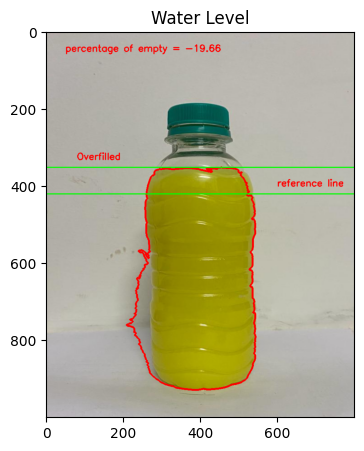

In [29]:
Colored_Liquid('Bottles_resources\T18.jpg')

The percentage of empty part is  0.94


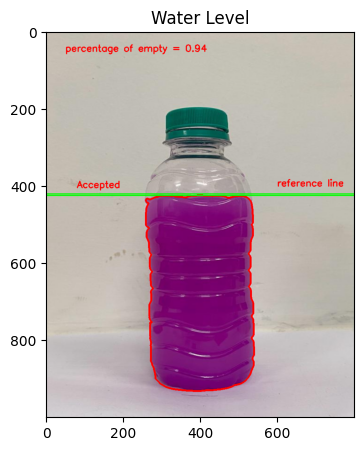

In [30]:
Colored_Liquid('Bottles_resources\T19.jpg')

The percentage of empty part is  8.5


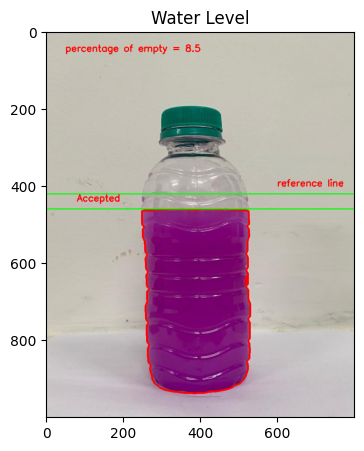

In [31]:
Colored_Liquid('Bottles_resources\T20.jpg')

The percentage of empty part is  -37.25


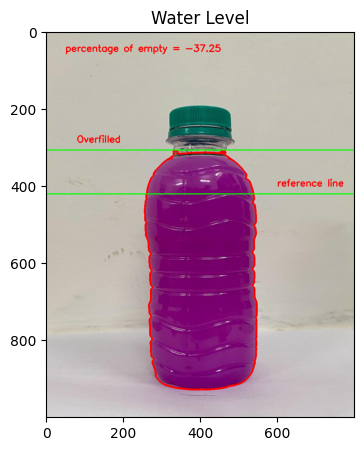

In [32]:
Colored_Liquid('Bottles_resources\T21.jpg')

The percentage of empty part is  -5.79


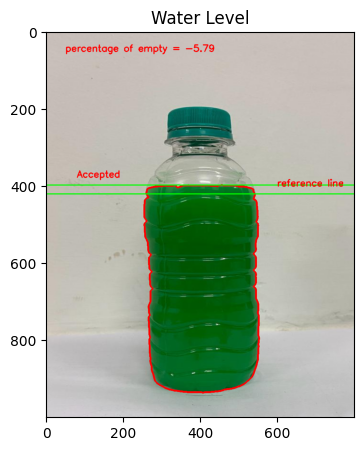

In [33]:
Colored_Liquid('Bottles_resources\T22.jpg')

The percentage of empty part is  46.63


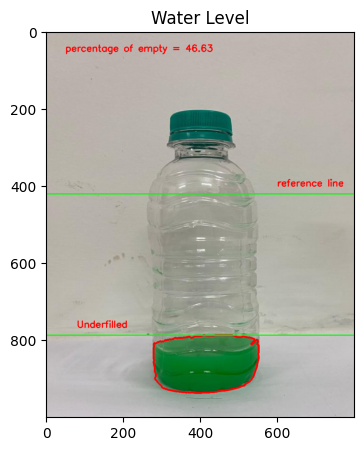

In [34]:
Colored_Liquid('Bottles_resources\T23.jpg')

The percentage of empty part is  -33.33


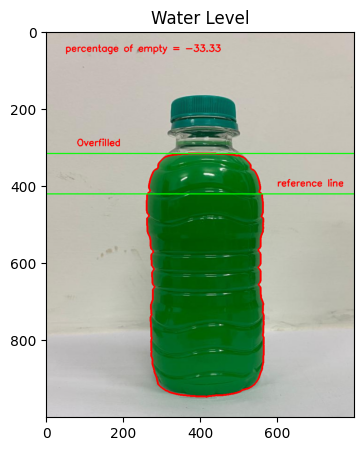

In [35]:
Colored_Liquid('Bottles_resources\T24.jpg')

The percentage of empty part is  4.76


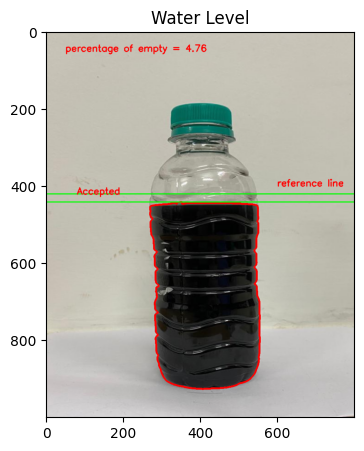

In [36]:
Colored_Liquid('Bottles_resources\T25.jpg')

The percentage of empty part is  50.18


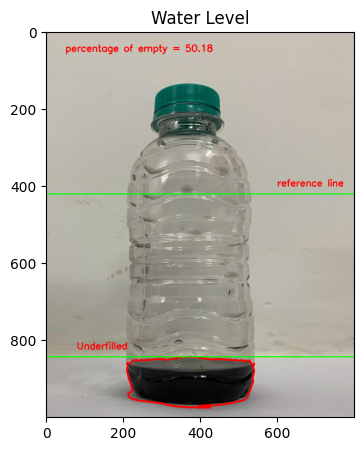

In [37]:
Colored_Liquid('Bottles_resources\T26.jpg')

The percentage of empty part is  -39.07


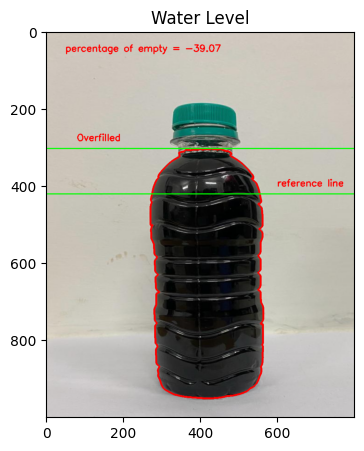

In [38]:
Colored_Liquid('Bottles_resources\T27.jpg')

The percentage of empty part is  4.11


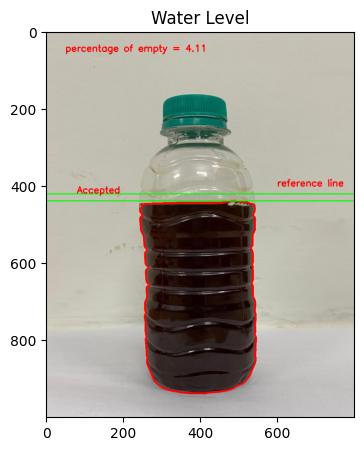

In [39]:
Colored_Liquid('Bottles_resources\T28.jpg')


The percentage of empty part is  30.0


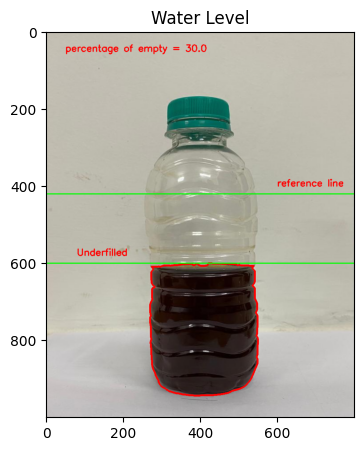

In [40]:
Colored_Liquid('Bottles_resources\T29.jpg')

The percentage of empty part is  -41.41


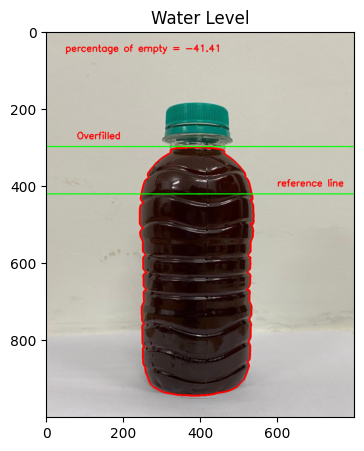

In [41]:
Colored_Liquid('Bottles_resources\T30.jpg')

The percentage of empty part is  29.88


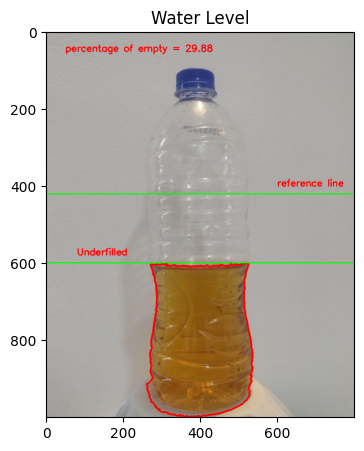

In [43]:
Colored_Liquid('Bottles_resources\B3_Halffilled.jpg')